In [85]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import os

from preprocess_image import *
from ImageUtils import *
from imageio import imread

### Preprocessing & Postprocessing

In [48]:
# First, preprocess the images.
orig_ims = os.listdir('orig_ims/')

for im in orig_ims:
    if '.jpg' in im:
        imName = im.split('.')[0]
        new_im = preprocess_im('orig_ims/'+im)
        np.save('orig_ims/'+imName, new_im)
        print 'Preprocessed image ' + imName + ' saved'

Preprocessed image balls saved
Preprocessed image bubbles saved
Preprocessed image cherries saved
Preprocessed image clouds saved
Preprocessed image forest saved
Preprocessed image fronds saved
Preprocessed image leaves saved
Preprocessed image rocks saved
Preprocessed image tulips saved
Preprocessed image worms saved


In [112]:
# POST PROCESSING: Resave all npy images as jpg's
outDir = 'v2'

for im in os.listdir(outDir):
    if '.npy' in im:
        imName = outDir+'/'+im
        imi = np.load(imName)
        scipy.misc.imsave(outDir+'/'+im[:-4]+'.jpg', imi)
        print im + ' saved as jpg'

2x2_pool2_forest_step_10000.npy saved as jpg
2x2_pool2_worms_step_10000.npy saved as jpg
2x2_pool4_forest_step_10000.npy saved as jpg
2x2_pool4_worms_step_10000.npy saved as jpg
4x4_pool2_forest_step_10000.npy saved as jpg
4x4_pool2_worms_step_10000.npy saved as jpg
4x4_pool4_forest_step_10000.npy saved as jpg
4x4_pool4_worms_step_10000.npy saved as jpg


### Visualizing synthesized textures at different layers

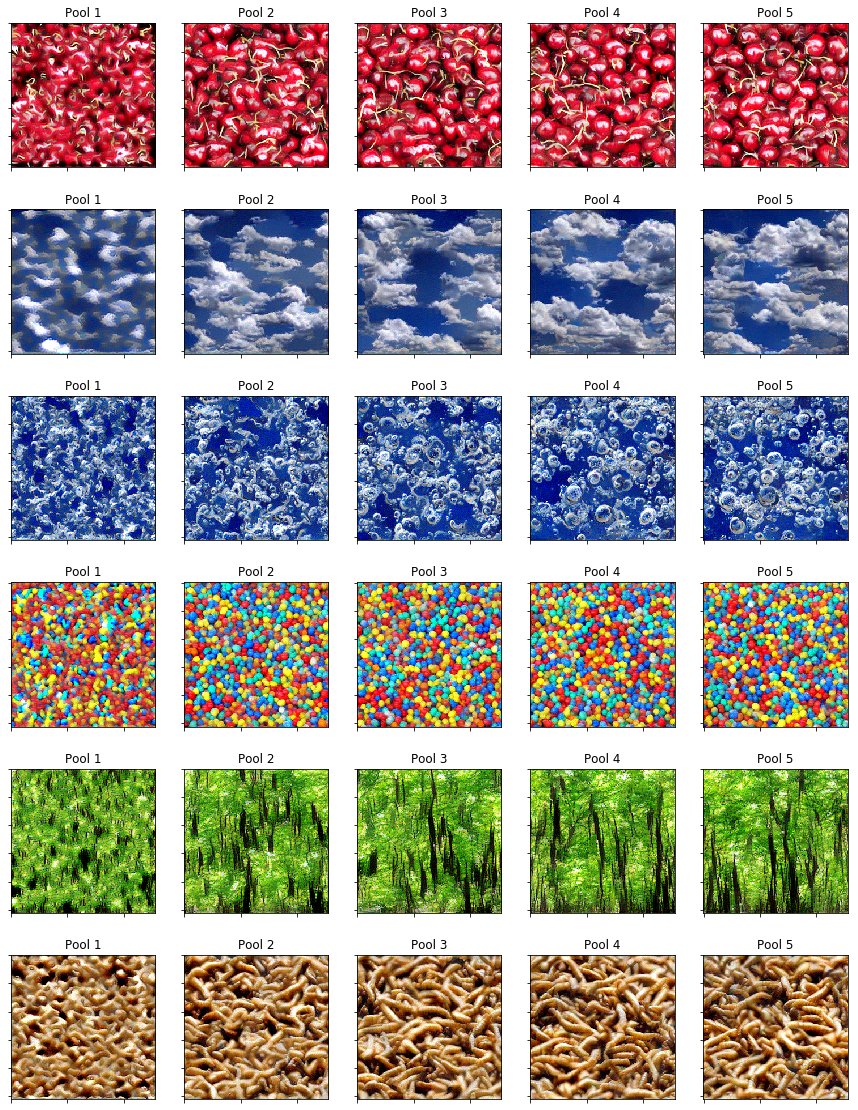

In [115]:
filepath = 'stimuli/v2'
ims = ['leaves', 'fronds', 'tulips', 'rocks', 'cherries', 'clouds', 'bubbles', 'balls', 'forest', 'worms']
ims = ['cherries', 'clouds', 'bubbles', 'balls', 'forest', 'worms']
#ims = ['leaves', 'fronds', 'tulips', 'rocks']

nIm = len(ims)
nLay = 5

fig = plt.figure(figsize=(15, 20))

for i in range(nIm):
    name = ims[i]

    imName1 = filepath + '/pool1_' + name + '_step_10000.npy'
    imName2 = filepath + '/pool2_' + name + '_step_10000.npy'
    imName3 = filepath + '/pool3_' + name + '_step_10000.npy'
    imName4 = filepath + '/pool4_' + name + '_step_10000.npy'
    imName5 = filepath + '/pool5_' + name + '_step_10000.npy'

    # Original
    # ax0 = fig.add_subplot(1,5,1)
    # im0 = postprocess_im(np.load('orig_ims/'+ name + '.npy'))
    # ax0.imshow(im0)
    # ax0.set_title('Original')

    # Pool 1
    ax1 = fig.add_subplot(nIm,nLay,i*nLay + 1)
    if os.path.isfile(imName1):
        ax1.imshow(np.load(imName1))
        ax1.set_title('Pool 1');
        ax1.xaxis.set_ticklabels([])
        ax1.yaxis.set_ticklabels([])


    # Pool 2
    ax2 = fig.add_subplot(nIm,nLay,i*nLay + 2)
    if os.path.isfile(imName2):
        ax2.imshow(np.load(imName2))
        ax2.set_title('Pool 2')
        ax2.xaxis.set_ticklabels([])
        ax2.yaxis.set_ticklabels([])


    # Pool 3
    ax3 = fig.add_subplot(nIm,nLay,i*nLay + 3)
    if os.path.isfile(imName3):
        ax3.imshow(np.load(imName3))
        ax3.set_title('Pool 3')
        ax3.xaxis.set_ticklabels([])
        ax3.yaxis.set_ticklabels([])


    # Pool 4
    ax4 = fig.add_subplot(nIm,nLay,i*nLay + 4)
    if os.path.isfile(imName4):
        ax4.imshow(np.load(imName4))
        ax4.set_title('Pool 4');
        ax4.xaxis.set_ticklabels([])
        ax4.yaxis.set_ticklabels([])
    
    # Pool 4
    ax5 = fig.add_subplot(nIm,nLay,i*nLay + 5)
    if os.path.isfile(imName5):
        ax5.imshow(np.load(imName5))
        ax5.set_title('Pool 5');
        ax5.xaxis.set_ticklabels([])
        ax5.yaxis.set_ticklabels([])

#plt.savefig('textureStim_byLayer.png')

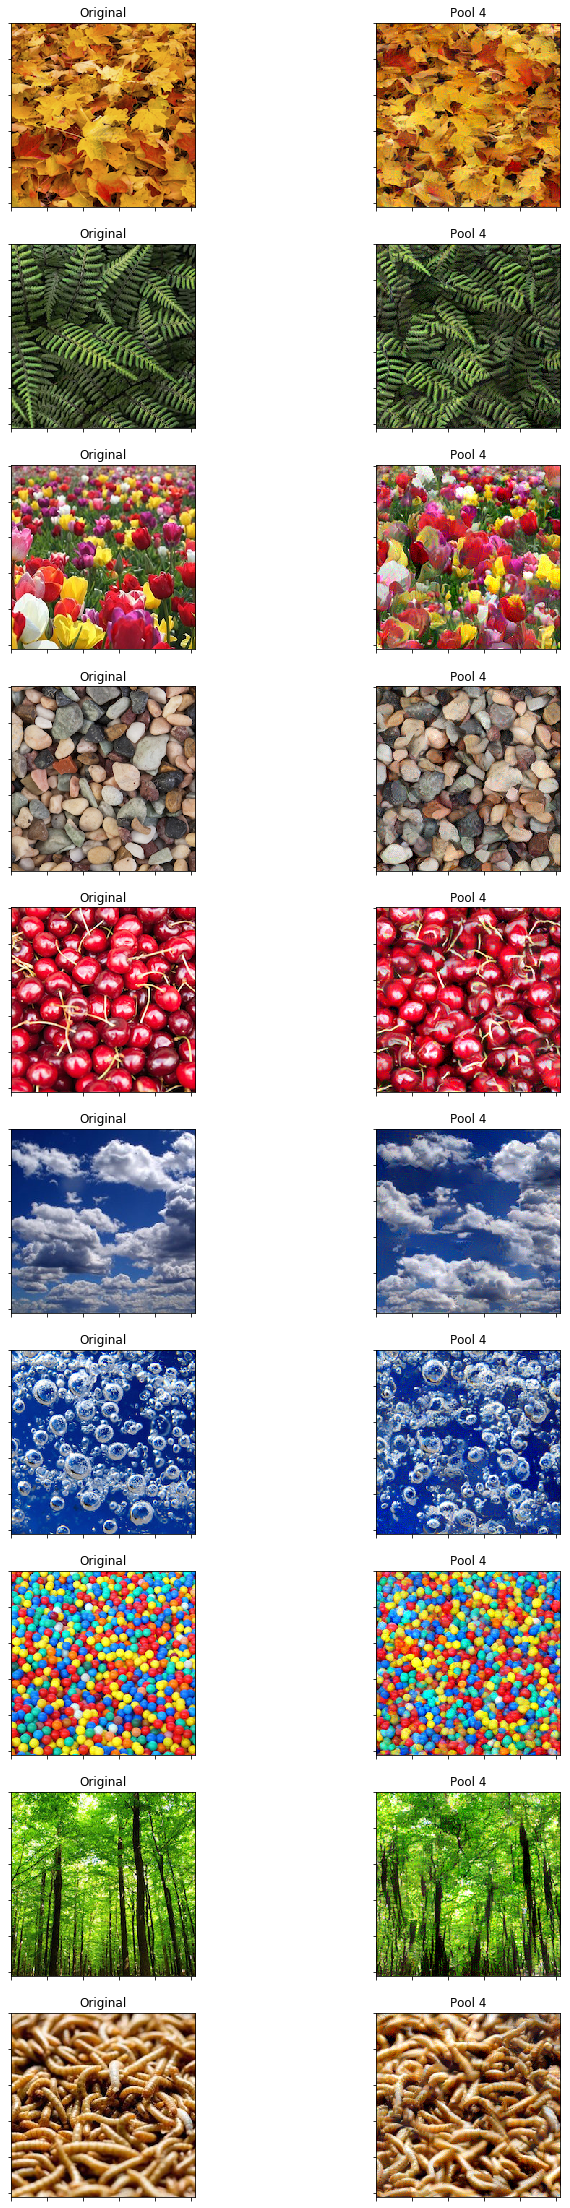

In [75]:
# Visualize and compare original image to synthesized version.
filepath = 'stimuli/v3'
#filepath2 = 'stimuli/v2'
ims = ['leaves', 'fronds', 'tulips', 'rocks', 'cherries', 'clouds', 'bubbles', 'balls', 'forest', 'worms']
#ims = ['cherries', 'clouds', 'bubbles', 'balls', 'forest', 'worms']
#ims = ['leaves', 'fronds', 'tulips', 'rocks']

nIm = len(ims)
nLay = 4

fig = plt.figure(figsize=(12,40))

for i in range(nIm):
    name = ims[i]
    imName = filepath + '/pool4_' + name + '_step_10000.npy'

    # Original
    ax1 = fig.add_subplot(nIm, 2, i*2 + 1)
    im1 = postprocess_im(np.load('orig_ims/'+ name + '.npy'))
    ax1.imshow(im1)
    ax1.set_title('Original')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])

    # Pool 4
    ax2 = fig.add_subplot(nIm, 2, i*2 + 2)
    ax2.imshow(np.load(imName))
    ax2.set_title('Pool 4')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    
    
#plt.savefig('orig_synth_comparison.png')

In [22]:
a = np.array(range(12))
b = np.reshape(a, (3,4))
b.shape

(3, 4)

### Visualizing synthesized textures at different pooling sizes

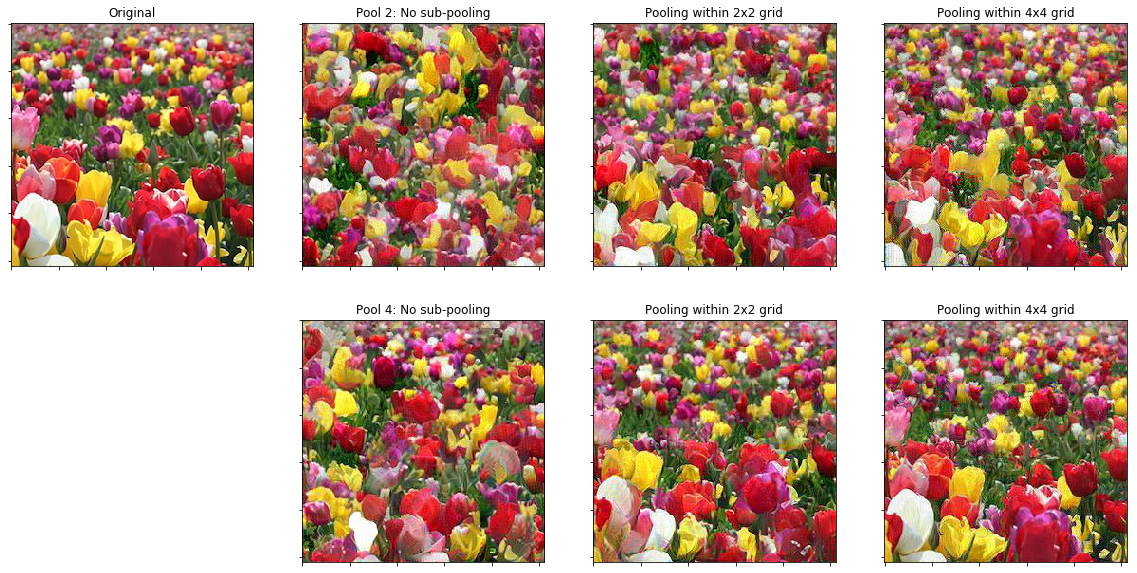

In [114]:
fig = plt.figure(figsize=(20, 10))

orignm = 'tulips'
nRows = 2
pools = ['2', '4']

# Original
ax1 = fig.add_subplot(nRows, 4, 1)
orig = postprocess_im(np.load('orig_ims/' + orignm + '.npy'))
ax1.imshow(orig)
ax1.set_title('Original')
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])

for ri in range(nRows):
    pool = pools[ri]
    # Pooling over whole image
    ax2 = fig.add_subplot(nRows, 4, ri*4 + 2)
    imName = 'pool/'+ '1x1' + '_pool' + pool+  '_' + orignm + '.jpg'
    ax2.imshow(imread(imName))
    ax2.set_title('Pool %s: No sub-pooling' % (pool) )
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])

    # Pooling within 2x2 grid
    ax2 = fig.add_subplot(nRows, 4, ri*4 + 3)
    imName = 'pool/'+ '2x2' + '_pool' + pool+  '_' + orignm + '.jpg'
    ax2.imshow(imread(imName))
    ax2.set_title('Pooling within 2x2 grid')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])

    # Pooling within 4x4 grid
    ax2 = fig.add_subplot(nRows, 4, ri*4 + 4)
    imName = 'pool/'+ '4x4' + '_pool' + pool+  '_' + orignm + '.jpg'
    ax2.imshow(imread(imName))
    ax2.set_title('Pooling within 4x4 grid')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([]);

The synthesized images above are generated to match the original up to DCN layer Pool2 (first row) and DCN layer Pool4 (second row). The "no sub-pooling" image uses the old Gram matrix formulation. The "Pooling within 2x2 grid" image computes Gram matrices that are constrained within one quadrant of the image. The "Pooling within 4x4 grid" image computes Gram matrices that are constrained within 1/16th of the image.